# Exploration des données 

In [1]:
import pandas as pd
metadata_fichier = pd.read_csv("./data/metadonnees_ESLO2_ENT_ENTJEUN.csv")

<Axes: xlabel='sexe'>

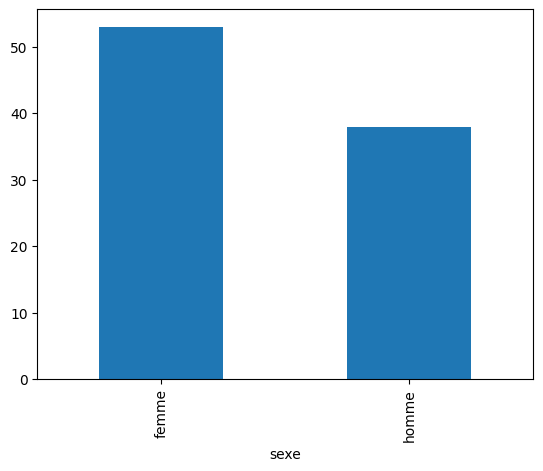

In [4]:
import matplotlib.pyplot as plt
metadata_fichier['sexe'].value_counts().plot(kind='bar')

In [8]:
# Rajout colonne classe_age
def class_age(age):
	if age == 'vieux': 
		return 3
	elif int(age) < 30:
		return 1
	elif int(age) > 60:
		return 3
	else:
		return 2
	
metadata_fichier['classe_age'] = metadata_fichier['age'].apply(class_age)

<Axes: xlabel='classe_age'>

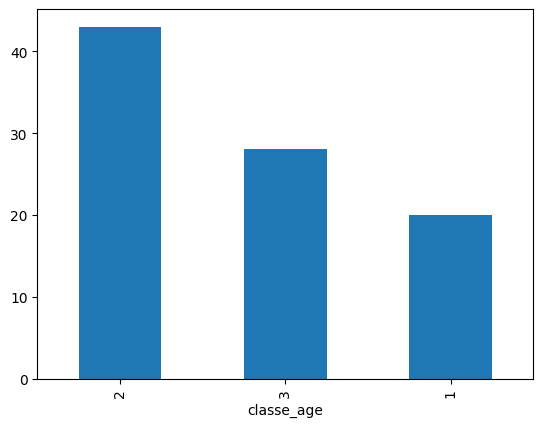

In [9]:
# graph représentation de la répartition des classes d'age 
metadata_fichier['classe_age'].value_counts().plot(kind='bar')

{'1': 23802, '2': 66240, '3': 34853}


<BarContainer object of 3 artists>

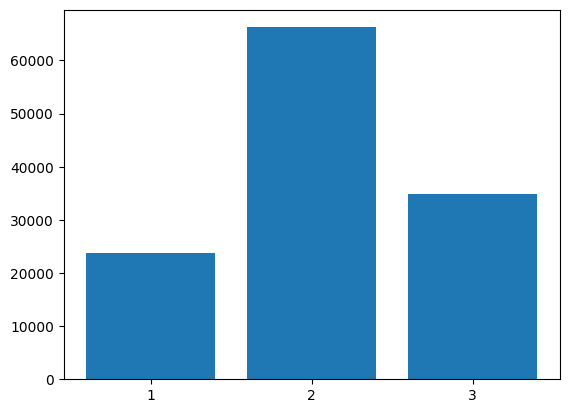

In [ ]:
# dico et graphe de Temps par classe d'age

dico_temps = {'1': 0, '2': 0, '3': 0}
for row in metadata_fichier.itertuples():
	temps_liste = row[4].split(':')
	temps = int(temps_liste[0])*60 + int(temps_liste[1])
	dico_temps[str(row.classe_age)] += temps

print(dico_temps)
plt.bar(dico_temps.keys(), dico_temps.values())

<Axes: xlabel='sexe'>

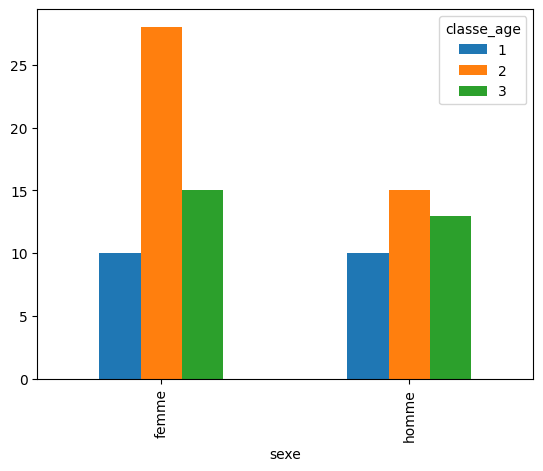

In [17]:
# répartition des classes d'age par sexe
metadata_fichier.groupby(['sexe', 'classe_age']).size().unstack().plot(kind='bar')